In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('.')
from BBH_kick_sim import Simulator

In [13]:
params={
    'cluster_mass': 1e6, #Default=1e6
    'radius': 2, #Default=2
    'imf_alpha':2.25, #Default=2.35
    'min_bh_star':10, #Default=10
    'bh_mass_frac':0.5, #Default=0.5
    'min_star':0.8, #Default=0.8
    'max_star':100, #Default=100
    'vel_thresh':0.1, #Default=0.1
    'rand_spin_type':'uniform', #Default='uniform'
}

sim = Simulator.Simulator(params,print_missing=True,rand_seed=1)
print(f'Escape velocity={sim.GC.v_esc}')

Setting up analytic mass distribution. This may take a while depending on your imf alpha
Done
Loaded NRSur7dq4Remnant fit.
Loaded NRSur3dq8Remnant fit.
Setup complete, Globular Cluster now has 14321 black holes.
Escape velocity=65.76879710558413


In [5]:
sim.begin_sim(sort_mass_first=False)

No stop time specified, Running until 1 or 0 black holes remain
14321/14321 remaining
12376/14321 remaining
10419/14321 remaining
8488/14321 remaining
6556/14321 remaining
4607/14321 remaining
2670/14321 remaining
737/14321 remaining
Finished. Total Simulation time: 1257645.7203242553
Total CPU time: 36.22232913970947


In [6]:
print(len(sim.GC.BHs),'in system, ejected:',len(sim.GC.ejected))
allBHs = sim.GC.BHs + sim.GC.ejected
print(len(allBHs))

0 in system, ejected: 6945
6945


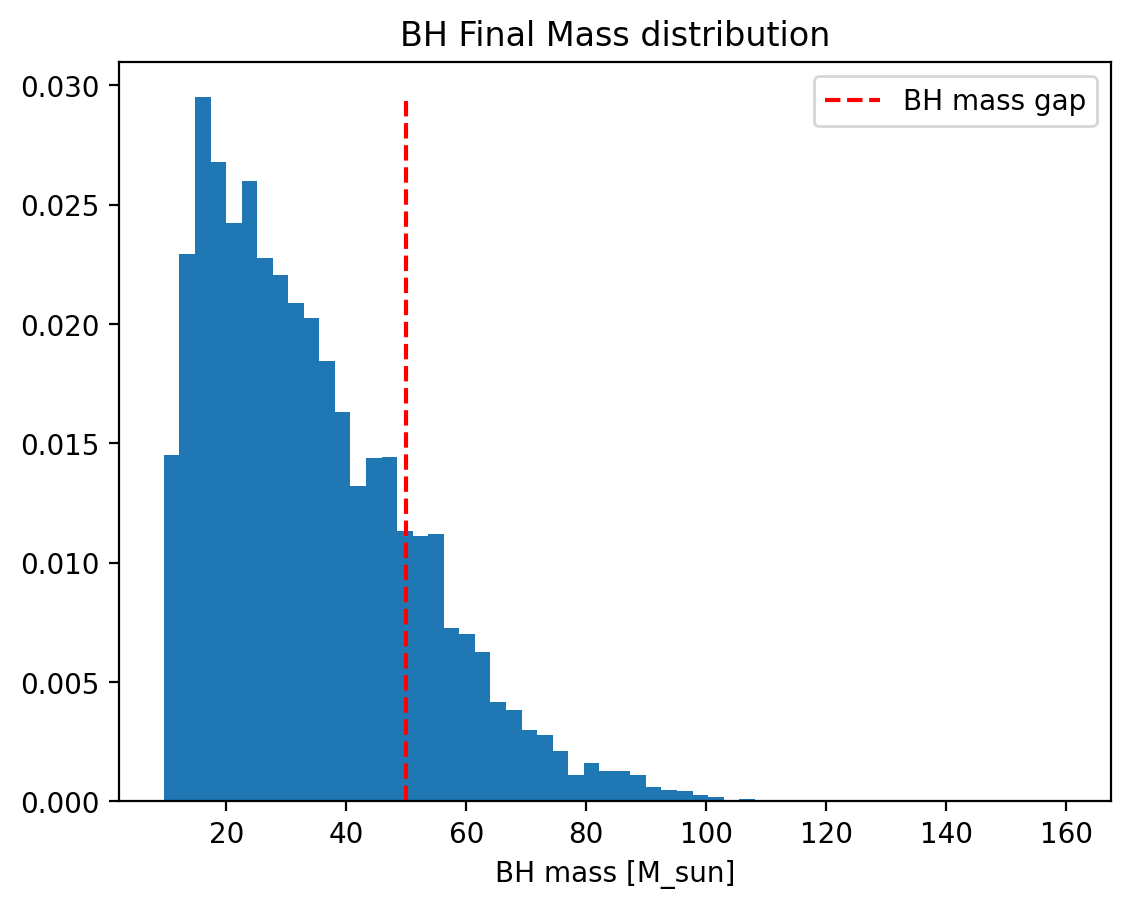

In [7]:
mall = [bh.m for bh in allBHs]
n,_,_=plt.hist(mall,bins='auto',density=True)
plt.title('BH Final Mass distribution')
plt.xlabel('BH mass [M_sun]')
maxBH = params['bh_mass_frac']*params['max_star']
plt.vlines(maxBH,0,max(n),linestyles='dashed',colors='r',label='BH mass gap')
plt.legend()
plt.show()

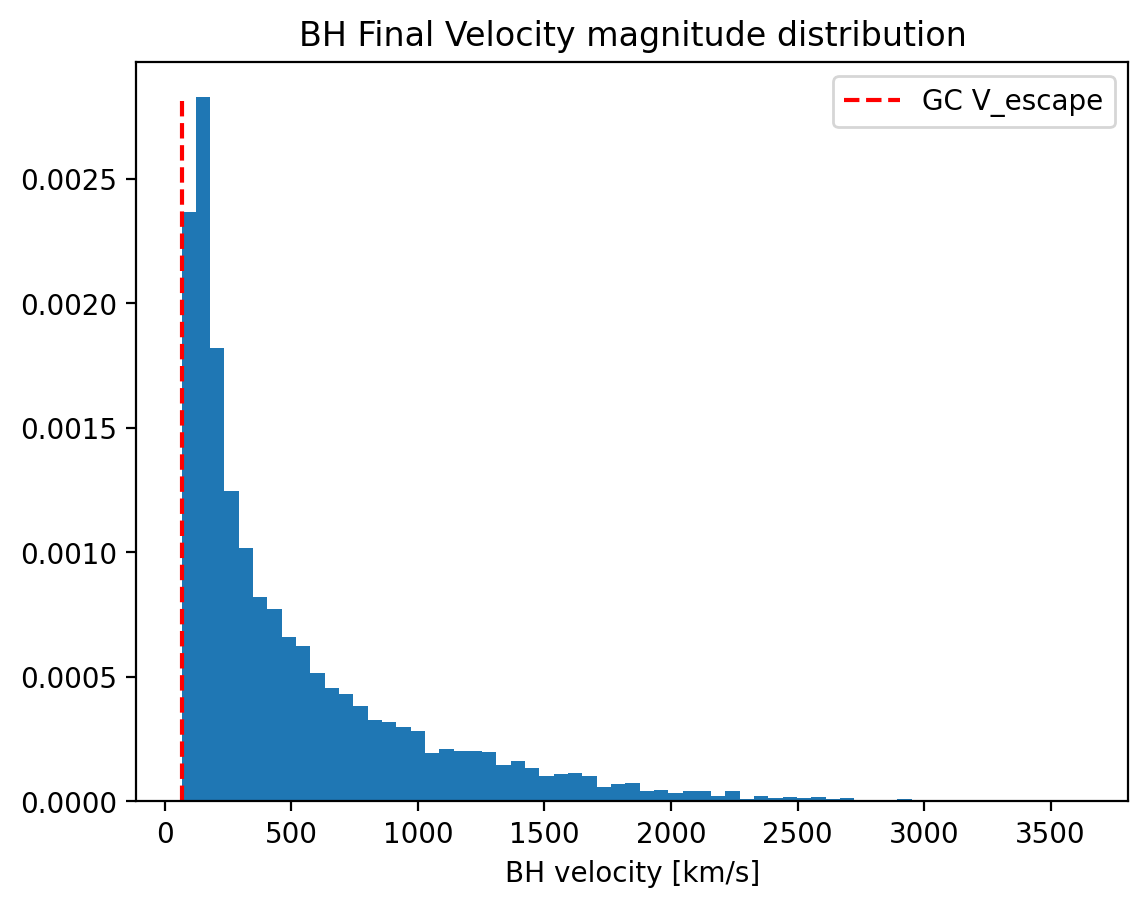

In [8]:
vall = np.array([np.sqrt(np.sum(np.square(bh.v))) for bh in allBHs])
n,_,_=plt.hist(vall,bins='auto',density=True)
plt.title('BH Final Velocity magnitude distribution')
plt.xlabel('BH velocity [km/s]')
plt.vlines(sim.GC.v_esc,0,max(n),linestyles='dashed',colors='r',label='GC V_escape')
plt.legend()
plt.show()

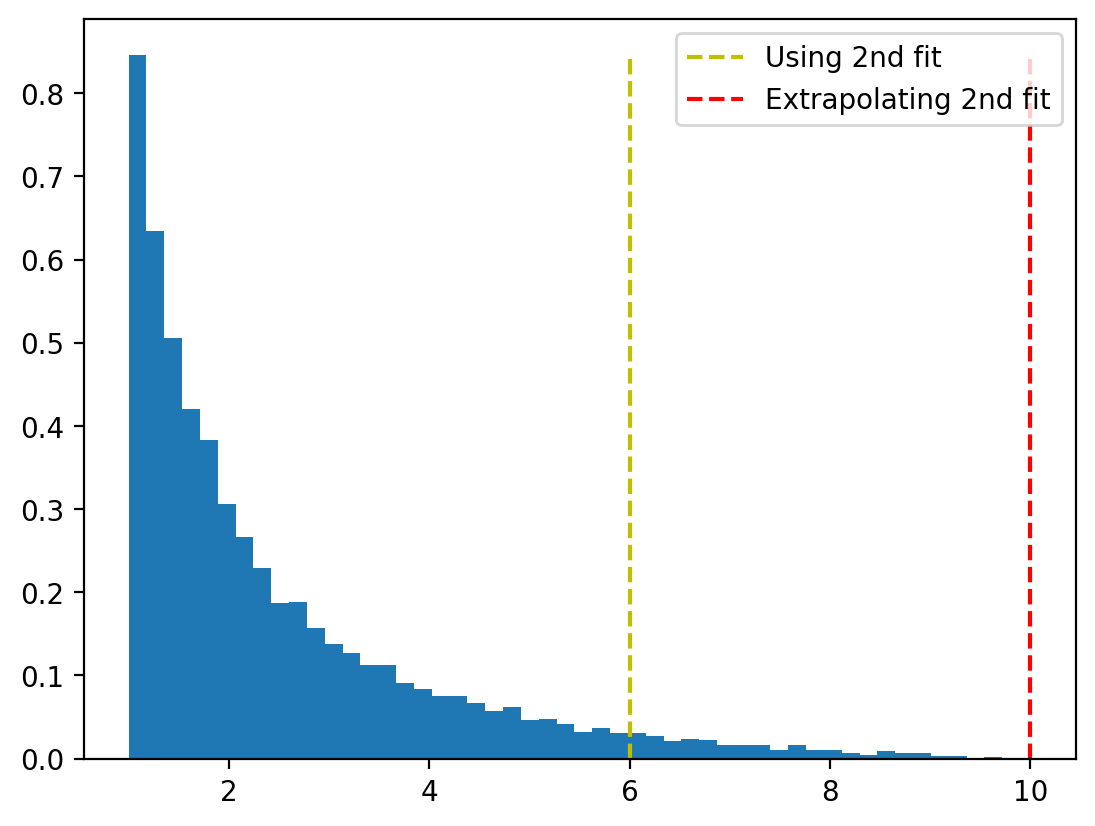

In [9]:
n,_,_=plt.hist(sim.collide_ratios,bins='auto',density=True)
plt.vlines(6,0,max(n),linestyles='dashed',colors='y',label='Using 2nd fit')
plt.vlines(10,0,max(n),linestyles='dashed',colors='r',label='Extrapolating 2nd fit')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


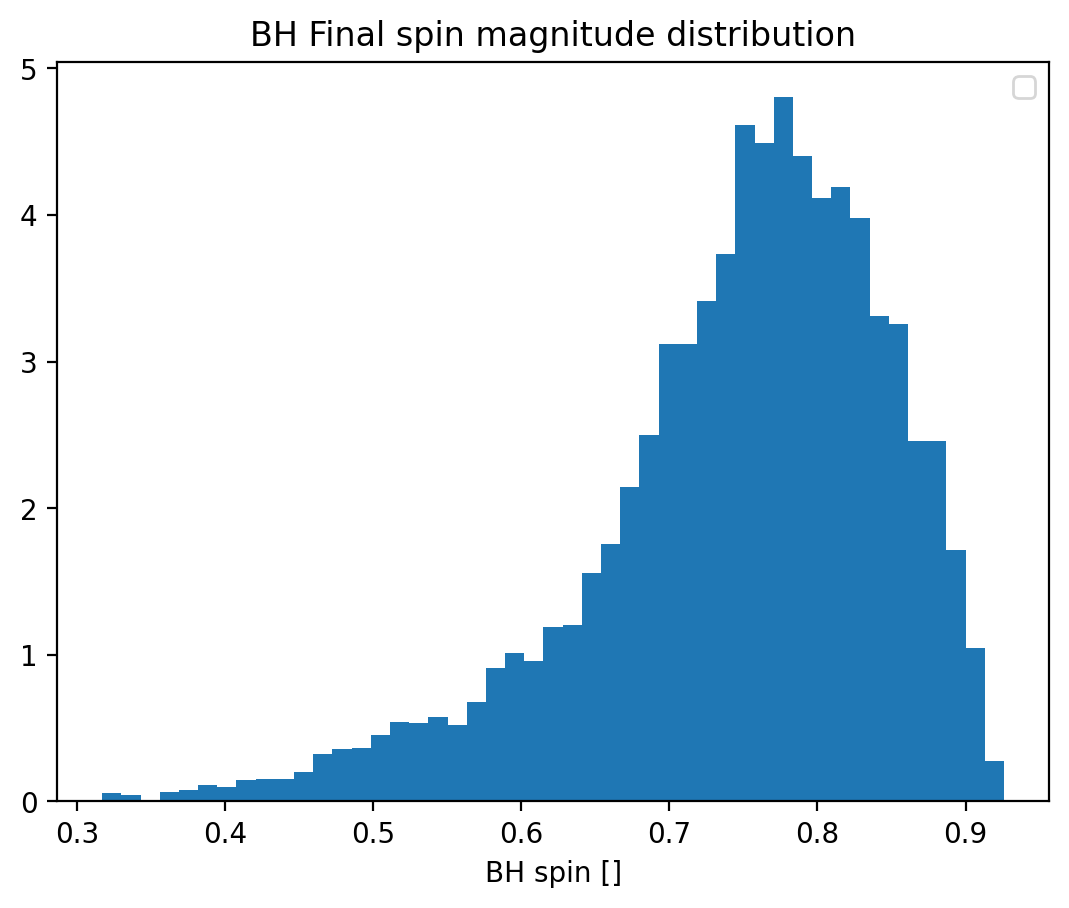

In [14]:
allS = np.array([np.sqrt(np.sum(np.square(bh.s))) for bh in allBHs])
n,_,_=plt.hist(allS,bins='auto',density=True)
plt.title('BH Final spin magnitude distribution')
plt.xlabel('BH spin []')
#plt.vlines(sim.GC.v_esc,0,max(n),linestyles='dashed',colors='r',label='GC V_escape')
plt.legend()
plt.show()

In [12]:
allBHs.sort(key=lambda b: -b.m)
for bh in allBHs:
    bh.printTree(params=['m','v_mag','v_imag','s_mag'])

[m=159.939,s_mag=2699.589,v_mag=2699.589,v_imag=2699.589]
├── [m=103.694,s_mag=0.1,v_mag=0.1,v_imag=50.647]
│   ├── [m=58.677,s_mag=0.1,v_mag=0.1,v_imag=52.205]
│   │   ├── [m=34.579,s_mag=0.0,v_mag=0.0,v_imag=0.0]
│   │   └── [m=28.07,s_mag=0.0,v_mag=0.0,v_imag=0.0]
│   └── [m=54.255,s_mag=0.1,v_mag=0.1,v_imag=52.11]
│       ├── [m=48.547,s_mag=0.0,v_mag=0.0,v_imag=0.0]
│       └── [m=6.706,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=68.791,s_mag=0.1,v_mag=0.1,v_imag=40.314]
    ├── [m=52.691,s_mag=0.1,v_mag=0.1,v_imag=42.313]
    │   ├── [m=47.737,s_mag=0.0,v_mag=0.0,v_imag=0.0]
    │   └── [m=5.806,s_mag=0.0,v_mag=0.0,v_imag=0.0]
    └── [m=20.193,s_mag=0.1,v_mag=0.1,v_imag=42.317]
        ├── [m=15.523,s_mag=0.0,v_mag=0.0,v_imag=0.0]
        └── [m=5.721,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=128.201,s_mag=1216.634,v_mag=1216.634,v_imag=1216.634]
├── [m=85.059,s_mag=0.1,v_mag=0.1,v_imag=38.541]
│   ├── [m=47.161,s_mag=0.0,v_mag=0.0,v_imag=0.0]
│   └── [m=42.252,s_mag=0.0,v_mag=0.0,v_imag=0

[m=51.353,s_mag=468.553,v_mag=468.553,v_imag=468.553]
├── [m=38.089,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=16.042,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.353,s_mag=292.444,v_mag=292.444,v_imag=292.444]
├── [m=41.875,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=10.991,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.348,s_mag=1207.718,v_mag=1207.718,v_imag=1207.718]
├── [m=27.619,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=27.168,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.342,s_mag=191.968,v_mag=191.968,v_imag=191.968]
├── [m=43.449,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=8.936,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.34,s_mag=905.565,v_mag=905.565,v_imag=905.565]
├── [m=28.602,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=26.015,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.326,s_mag=373.078,v_mag=373.078,v_imag=373.078]
├── [m=40.174,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=13.151,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=51.318,s_mag=116.322,v_mag=116.322,v_imag=116.322]
├── [m=43.558,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=8.887,s_ma

[m=36.339,s_mag=514.525,v_mag=514.525,v_imag=514.525]
├── [m=27.44,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=10.379,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.338,s_mag=1599.695,v_mag=1599.695,v_imag=1599.695]
├── [m=27.156,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=11.286,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.337,s_mag=1233.473,v_mag=1233.473,v_imag=1233.473]
├── [m=23.229,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=15.517,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.335,s_mag=269.297,v_mag=269.297,v_imag=269.297]
├── [m=29.312,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=7.965,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.327,s_mag=208.042,v_mag=208.042,v_imag=208.042]
├── [m=30.321,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=6.781,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.323,s_mag=1106.229,v_mag=1106.229,v_imag=1106.229]
├── [m=27.104,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=11.69,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=36.321,s_mag=221.81,v_mag=221.81,v_imag=221.81]
├── [m=31.63,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=5.305,s_ma

[m=25.85,s_mag=209.084,v_mag=209.084,v_imag=209.084]
├── [m=19.765,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=7.023,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.844,s_mag=402.6,v_mag=402.6,v_imag=402.6]
├── [m=14.208,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=13.466,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.84,s_mag=119.03,v_mag=119.03,v_imag=119.03]
├── [m=19.886,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=7.375,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.837,s_mag=199.267,v_mag=199.267,v_imag=199.267]
├── [m=20.263,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=6.537,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.833,s_mag=1344.798,v_mag=1344.798,v_imag=1344.798]
├── [m=14.069,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=13.586,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.827,s_mag=349.274,v_mag=349.274,v_imag=349.274]
├── [m=19.325,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=7.405,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=25.825,s_mag=138.818,v_mag=138.818,v_imag=138.818]
├── [m=21.385,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=5.049,s_mag=0.0,v_mag=0

[m=17.109,s_mag=1272.319,v_mag=1272.319,v_imag=1272.319]
├── [m=9.427,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=9.036,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.109,s_mag=205.697,v_mag=205.697,v_imag=205.697]
├── [m=11.947,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=6.225,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.104,s_mag=684.982,v_mag=684.982,v_imag=684.982]
├── [m=11.575,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=6.762,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.098,s_mag=97.912,v_mag=97.912,v_imag=97.912]
├── [m=9.606,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=8.379,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.093,s_mag=2240.76,v_mag=2240.76,v_imag=2240.76]
├── [m=12.199,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=5.832,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.085,s_mag=269.902,v_mag=269.902,v_imag=269.902]
├── [m=12.297,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=5.744,s_mag=0.0,v_mag=0.0,v_imag=0.0]

[m=17.081,s_mag=102.153,v_mag=102.153,v_imag=102.153]
├── [m=13.028,s_mag=0.0,v_mag=0.0,v_imag=0.0]
└── [m=5.011,s_mag=0.0,v_m

In [68]:
import pickle

with open('testfile.pkl','wb') as f:
    pickle.dump((sim.sim_params,sim.GC),f)

AttributeError: 'Simulator' object has no attribute 'sim_params'